In [5]:
import numpy as np
import pandas as pd

In [6]:
positive = pd.read_csv('positive2016.csv')
positive["CME"] = 1
negative = pd.read_csv('negative2016.csv')
negative["CME"] = 0

In [7]:
data = pd.concat([positive, negative], ignore_index=True)

In [8]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,359,5.699735e+22,82.488,0.001285,3897.788,12.100,2835.275,37.319,0.003836,31.916,...,4.489937e+23,26.183,1631.551880,4.462,111.481,5637,12360,M1.3,2015.06.12_07:29_TAI,0
418,360,5.030321e+22,84.406,-0.010059,18649.460,51.975,3790.262,56.851,-0.014943,53.730,...,1.586148e+24,47.933,1852.075806,4.995,644.160,5692,12371,M1.0,2015.06.19_06:48_TAI,0
419,361,5.012767e+22,79.442,-0.011058,17702.280,57.464,3866.555,55.125,-0.019343,56.835,...,1.704056e+24,50.868,1849.319458,4.941,801.508,5692,12371,M2.7,2015.06.20_02:34_TAI,0
420,362,4.341204e+22,109.424,0.005738,5334.497,18.022,2990.720,52.363,0.014466,36.470,...,4.428561e+23,31.039,1728.649536,4.532,358.677,5673,12367,M3.8,2015.06.20_09:44_TAI,0


## Plotting histograms to see the variability of the data

In [9]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [10]:
X = data.drop(columns=['CME'])
y = data['CME']

In [11]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [12]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.110342,0.555340,0.576869,0.605487,0.871939,0.204824,0.796086,0.617300,0.937815,0.565928,0.523706,0.202952,0.116747,0.133011,0.900055,0.128267,0.875866,0.253467,1
1,0.109806,0.389146,0.327431,0.415653,0.699841,0.109642,0.476976,0.359615,0.712539,0.353911,0.543313,0.132131,0.029364,0.088537,0.712075,0.130544,0.784360,0.020611,1
2,0.304362,0.357640,0.427324,0.374485,0.456517,0.294006,0.371139,0.467390,0.470255,0.363660,0.342142,0.311960,0.346695,0.202599,0.503348,0.267394,0.886803,0.208976,1
3,0.117444,0.578940,0.449293,0.119330,0.206602,0.100299,0.341865,0.557608,0.296639,0.489462,0.446546,0.123382,0.194273,0.034370,0.301701,0.131817,0.723843,0.124460,1
4,0.097242,0.581156,0.694119,0.462856,0.698426,0.174382,0.731767,0.835762,0.778385,0.546176,0.690747,0.172255,0.454135,0.098705,0.724424,0.172403,0.870762,0.367955,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.286994,0.252878,0.361452,0.127298,0.184092,0.194879,0.188126,0.403803,0.235496,0.225232,0.418693,0.229002,0.006619,0.083911,0.237431,0.224790,0.813343,0.037017,0
418,0.252754,0.275855,0.241890,0.733563,0.825201,0.262794,0.480145,0.297115,0.790080,0.315683,0.338410,0.272691,0.234753,0.299709,0.834303,0.255808,0.910499,0.218931,0
419,0.251856,0.216388,0.231359,0.694636,0.913452,0.268220,0.454340,0.272116,0.869019,0.234153,0.432859,0.302526,0.318563,0.322085,0.914846,0.255421,0.900656,0.272667,0
420,0.217506,0.575562,0.408382,0.186344,0.279306,0.205934,0.413046,0.464198,0.351274,0.534319,0.423710,0.237543,0.211387,0.082746,0.370692,0.238448,0.826103,0.121437,0


In [13]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [14]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)



[0.09261774 5.72579729 0.7381978  0.01219224 0.47418033 0.78099688
 3.13400978 1.80413204 0.02556041 8.41292418 0.14965466 0.3542363
 9.62621717 0.46061421 0.23030296 0.09553315 0.02773737 9.4816348 ]


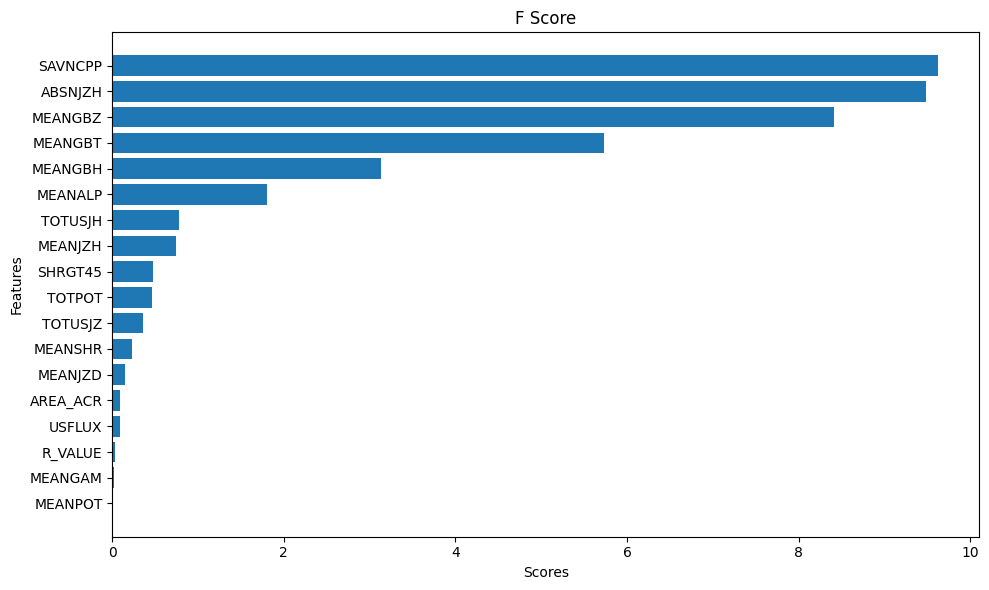

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [16]:
df_reordered = df.loc[:, ordered_features]

In [17]:
df_reordered

,SAVNCPP,ABSNJZH,MEANGBZ,MEANGBT,MEANGBH,MEANALP,TOTUSJH,MEANJZH,SHRGT45,TOTPOT,TOTUSJZ,MEANSHR,MEANJZD,AREA_ACR,USFLUX,R_VALUE,MEANGAM,MEANPOT,CME
0,0.116747,0.253467,0.565928,0.555340,0.796086,0.617300,0.204824,0.576869,0.871939,0.133011,0.202952,0.900055,0.523706,0.128267,0.110342,0.875866,0.937815,0.605487,1
1,0.029364,0.020611,0.353911,0.389146,0.476976,0.359615,0.109642,0.327431,0.699841,0.088537,0.132131,0.712075,0.543313,0.130544,0.109806,0.784360,0.712539,0.415653,1
2,0.346695,0.208976,0.363660,0.357640,0.371139,0.467390,0.294006,0.427324,0.456517,0.202599,0.311960,0.503348,0.342142,0.267394,0.304362,0.886803,0.470255,0.374485,1
3,0.194273,0.124460,0.489462,0.578940,0.341865,0.557608,0.100299,0.449293,0.206602,0.034370,0.123382,0.301701,0.446546,0.131817,0.117444,0.723843,0.296639,0.119330,1
4,0.454135,0.367955,0.546176,0.581156,0.731767,0.835762,0.174382,0.694119,0.698426,0.098705,0.172255,0.724424,0.690747,0.172403,0.097242,0.870762,0.778385,0.462856,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.006619,0.037017,0.225232,0.252878,0.188126,0.403803,0.194879,0.361452,0.184092,0.083911,0.229002,0.237431,0.418693,0.224790,0.286994,0.813343,0.235496,0.127298,0
418,0.234753,0.218931,0.315683,0.275855,0.480145,0.297115,0.262794,0.241890,0.825201,0.299709,0.272691,0.834303,0.338410,0.255808,0.252754,0.910499,0.790080,0.733563,0
419,0.318563,0.272667,0.234153,0.216388,0.454340,0.272116,0.268220,0.231359,0.913452,0.322085,0.302526,0.914846,0.432859,0.255421,0.251856,0.900656,0.869019,0.694636,0
420,0.211387,0.121437,0.534319,0.575562,0.413046,0.464198,0.205934,0.408382,0.279306,0.082746,0.237543,0.370692,0.423710,0.238448,0.217506,0.826103,0.351274,0.186344,0


In [18]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [19]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_2663/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_2663/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


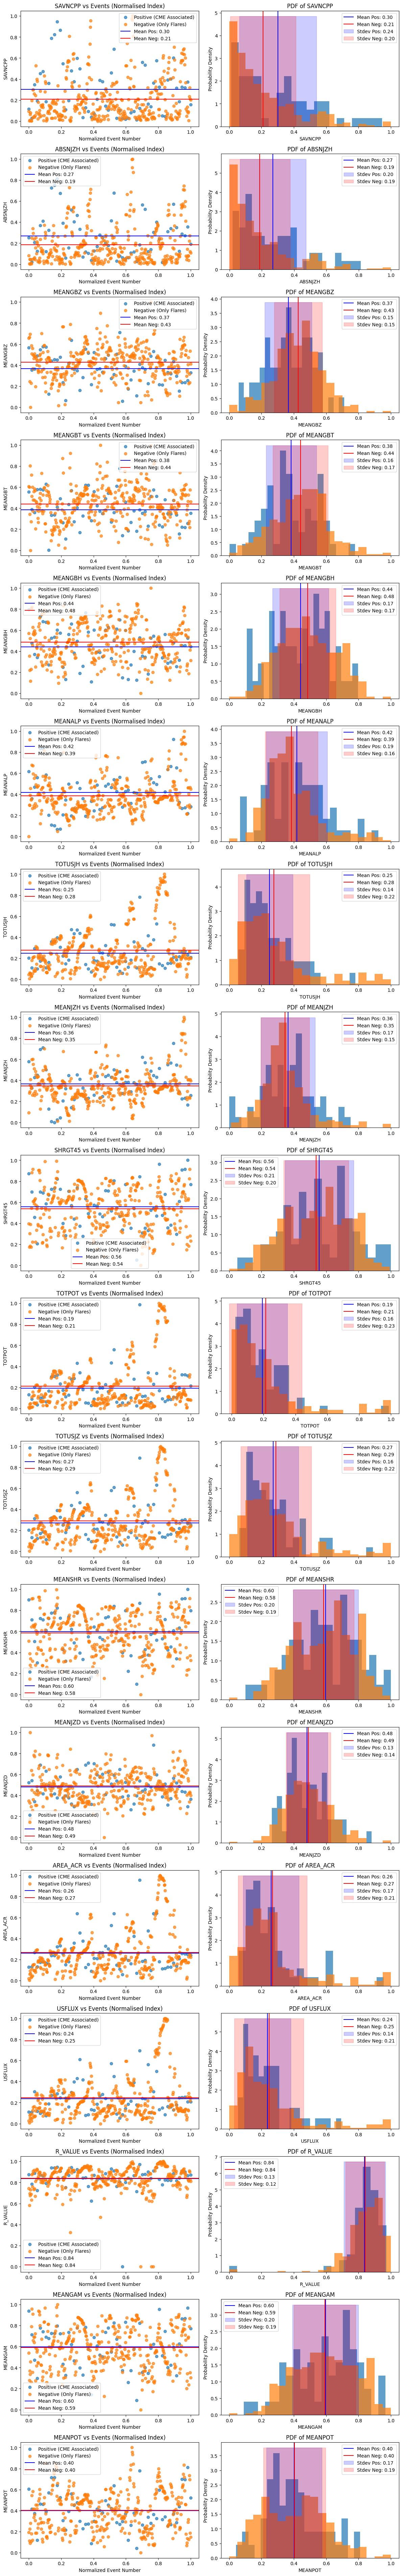

In [21]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive (CME Associated)")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative (Only Flares)")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Events (Normalised Index)")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2,label=f'Stdev Pos: {std_pos:.2f}')
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2, label=f'Stdev Neg: {std_neg:.2f}')
    plt.xlabel(ordered_features[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2016_parameters_pdf.jpeg")
plt.show()